# Summary
1.1 Cover and Hart proposed the original proximity algorithm in 1968
1.2 Classification algorithm
1.3 Enter instance-based learning, lazy learning is to hold back the model temporarily without training the model in advance
1.4 In order to determine the category of the unknown instance, all instances of the known category are used as a reference

###### algorithm
step:
select parameter K
Calculate the distance between the unknown instance and all known instances
Select the latest K known instances
According to the majority-voting rule (majority-voting), the unknown instance is classified as the category with the largest number among the K nearest samples

##### Euclidean Distance
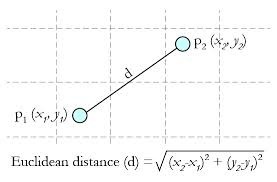

## Pros and cons
advantage:

Simple, easy to understand, easy to implement
The robustness of losing noise data can be achieved by selecting K

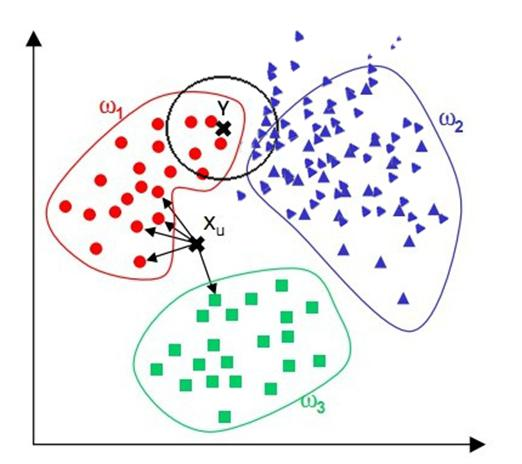

Need a lot of space to store all known instances
High algorithm complexity (need to compare all known instances with the instances to be classified)
When the sample distribution is unbalanced, such as when one type of sample is too large (too many instances) dominates, a new unknown instance is easily classified as this dominant sample, because the number of such sample instances is too large, but This new unknown instance is actually close to the target sample
As shown in the figure above, point Y should be classified as red, but because the minority obeys the majority, it is classified as blue

reference-https://www.programmersought.com/article/26894945701/

In [81]:
import csv
with open(r"C:\Users\TMR\Desktop\DataScience\DataSets\iris.data.txt") as csvfile:
    lines = csv.reader(csvfile)
    for row in lines:
        print(','.join(row))
       


5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.0,3.2,1.2,0.2,Iris

In [82]:
#split data set into training and test

In [83]:
import csv
import random

def loadDataset(filename, split, trainingSet = [], testSet = []):
    with open(filename, 'rt') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])	# Convert character data to floating point
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])               




In [84]:
#test this function
trainingSet=[]
testSet=[]
handleDataset(r'C:\Users\TMR\Desktop\DataScience\DataSets\iris.data.txt', 0.66, trainingSet, testSet)
print ('Train: ' + repr(len(trainingSet)))
print ('Test: ' + repr(len(testSet)))

Train: 95
Test: 54


### Calculate the distance
In order to make any predictions, you have to calculate the distance between the new point and the existing points, as you will be needing k closest points.

In this case for calculating the distance, we will use the Euclidean distance. This is defined as the square root of the sum of the squared differences between the two arrays of numbers

Specifically, we need only first 4 attributes(features) for distance calculation as the last attribute is a class label. So for one of the approach is to limit the Euclidean distance to a fixed length, thereby ignoring the final dimension

 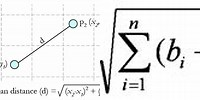

In [85]:
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):	# Calculate the sum of each dimension
        distance += pow((instance1[x]-instance2[x]), 2)
    return math.sqrt(distance)	# Test data to each training data distance



Testing the euclideanDistance function,

In [86]:
data1 = [2, 2, 2, 'a']
data2 = [5, 5, 5, 'b']#27
distance = euclideanDistance(data1, data2, 3)
print ('Distance: ' + repr(distance))

Distance: 5.196152422706632


# Find k nearest point
Now distance from each point can use to collect the k most similar points/instances for the given test data/instance.

This is a straightforward process: Calculate the distance wrt all the instance and select the subset having the smallest Euclidean distance.

Let’s create a getKNeighbors function that  returns k most similar neighbors from the training set for a given test instance

In [87]:
#create a getKNeighbors function that  returns k most similar neighbors from the training set for a given test instance
import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        #testinstance
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
        #distances.append(dist)
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):	# k nearest distance
        neighbors.append(distances[x][0])
        return neighbors



In [88]:
#Testing getKNeighbors function
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k = 1
neighbors = getKNeighbors(trainSet, testInstance, 1)
print(neighbors)

[[4, 4, 4, 'b']]


# Predict the class
predicted response based on those neighbors
by allowing each neighbor to vote for their class attribute, and take the majority vote as the prediction.

create a getResponse function for getting the majority voted response from a number of neighbors.

In [89]:
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):	# Look at the neighbor’s tags and vote
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]	# Tags with the most votes


Testing getResponse function

In [90]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
print(getResponse(neighbors))

a


# Check the accuracy
check how accurate our prediction

An easy way to evaluate the accuracy of the model is to calculate a ratio of the total correct predictions out of all predictions made.



In [91]:
#create a getAccuracy function which sums the total correct predictions and returns the accuracy as a percentage of correct classifications.
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet)))*100.0  

#### Testing getAccuracy function

In [92]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

66.66666666666666


In [95]:
###### Example of kNN implemented from Scratch in Python       
def main():
    #prepare data
    trainingSet = []
    testSet = []
    split = 0.67
    loadDataset(r'C:\Users\TMR\Desktop\DataScience\DataSets\iris.data.txt', split, trainingSet, testSet)
    print('Train set: ' + repr(len(trainingSet)))
    print('Test set: ' + repr(len(testSet)))
    #generate predictions
    predictions = []
    k = 3
    for x in range(len(testSet)):
        # trainingsettrainingSet[x]
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print ('>predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    print ('predictions: ' + repr(predictions))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

if __name__ == '__main__':
    main()


Train set: 106
Test set: 43
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-setosa', actual='Iris-setosa'
>predicted='Iris-versicolor', actual='Iris-versicolor'
>predicted='Iris-versicolor', actual='Iris-versicolor'
>predicted='Iris-versicolor', actual='Iris-versicolor'
>predicted='Iris-versicolor', actual='Iris-versicolor'
>predicted='Iris-versicolor', actual='Iris-versicolor'
>predicted='Iris-versicolor', actual='I